<a href="https://colab.research.google.com/github/krVatsal/CSS-Battle-24/blob/main/crackthecase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd

In [52]:
df= pd.read_csv('/content/Coffee Shop Sales.xlsx - Transactions.csv')

In [53]:
df


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,6/30/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,6/30/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,6/30/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,6/30/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [55]:
import matplotlib.pyplot as plt

In [56]:
df=df.iloc[:, 1:]

In [57]:
unique_products = df['product_id'].nunique()
print("Unique products sold:", unique_products)

Unique products sold: 80


In [58]:
total_quantity_per_category = df.groupby('product_category')['transaction_qty'].sum()
print("Total quantity per product category:\n", total_quantity_per_category)


Total quantity per product category:
 product_category
Bakery                23214
Branded                 776
Coffee                89250
Coffee beans           1828
Drinking Chocolate    17457
Flavours              10511
Loose Tea              1210
Packaged Chocolate      487
Tea                   69737
Name: transaction_qty, dtype: int64


In [59]:
total_quantity_per_category = df.groupby('product_category')['transaction_qty'].sum()
print("Total quantity per product category:\n", total_quantity_per_category)


Total quantity per product category:
 product_category
Bakery                23214
Branded                 776
Coffee                89250
Coffee beans           1828
Drinking Chocolate    17457
Flavours              10511
Loose Tea              1210
Packaged Chocolate      487
Tea                   69737
Name: transaction_qty, dtype: int64


In [60]:
top_stores = df['store_location'].value_counts().head(3)
print("Top 3 stores with highest transactions:\n", top_stores)


Top 3 stores with highest transactions:
 store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64


In [61]:
avg_price_per_category = df.groupby('product_category')['unit_price'].mean()
print("Average unit price per category:\n", avg_price_per_category)


Average unit price per category:
 product_category
Bakery                 3.551682
Branded               17.720214
Coffee                 3.023646
Coffee beans          21.018397
Drinking Chocolate     4.148827
Flavours               0.800000
Loose Tea              9.267438
Packaged Chocolate     9.050595
Tea                    2.817121
Name: unit_price, dtype: float64


In [62]:
most_common_product_type = df['product_type'].mode()[0]
print("Most common product type:", most_common_product_type)


Most common product type: Brewed Chai tea


In [63]:
df['total_sales'] = df['transaction_qty'] * df['unit_price']
total_sales_per_location = df.groupby('store_location')['total_sales'].sum()
print("Total sales per store location:\n", total_sales_per_location)


Total sales per store location:
 store_location
Astoria            232243.91
Hell's Kitchen     236511.17
Lower Manhattan    230057.25
Name: total_sales, dtype: float64


In [64]:
df['day_of_week'] = pd.to_datetime(df['transaction_date']).dt.day_name()
avg_transaction_qty_per_day = df.groupby('day_of_week')['transaction_qty'].mean()
print("Average transaction quantity per day:\n", avg_transaction_qty_per_day)


Average transaction quantity per day:
 day_of_week
Friday       1.438044
Monday       1.443007
Saturday     1.443881
Sunday       1.430698
Thursday     1.439087
Tuesday      1.436138
Wednesday    1.437119
Name: transaction_qty, dtype: float64


In [65]:
total_revenue_per_product = df.groupby('product_detail')['total_sales'].sum()
top_revenue_product = total_revenue_per_product.idxmax()
print("Product with highest total revenue:", top_revenue_product)


Product with highest total revenue: Sustainably Grown Organic Lg


In [66]:
avg_transaction_per_location = df.groupby('store_location')['total_sales'].mean()
top_avg_transaction_location = avg_transaction_per_location.idxmax()
print("Store with highest avg transaction amount:", top_avg_transaction_location)


Store with highest avg transaction amount: Lower Manhattan


In [67]:
df['month'] = pd.to_datetime(df['transaction_date']).dt.month
monthly_sales = df.groupby('month')['total_sales'].sum()
print("Total sales per month:\n", monthly_sales)


Total sales per month:
 month
1     81677.74
2     76145.19
3     98834.68
4    118941.08
5    156727.76
6    166485.88
Name: total_sales, dtype: float64


In [68]:
df['hour'] = pd.to_datetime(df['transaction_time']).dt.hour
peak_hours_per_category = df.groupby(['product_category', 'hour'])['total_sales'].sum().reset_index()
peak_hours = peak_hours_per_category.loc[peak_hours_per_category.groupby('product_category')['total_sales'].idxmax()]
print("Peak sales hours per category:\n", peak_hours)


<ipython-input-68-7bc319418a31>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['transaction_time']).dt.hour


Peak sales hours per category:
        product_category  hour  total_sales
4                Bakery    10     10982.50
17              Branded     8      2098.00
34               Coffee    10     33297.10
49         Coffee beans    10      7608.70
62   Drinking Chocolate     8      8166.00
79             Flavours    10      1532.80
93            Loose Tea     9      2072.15
109  Packaged Chocolate    10       799.79
124                 Tea    10     23028.55


In [69]:
revenue_per_category = df.groupby('product_category')['total_sales'].sum()
top_revenue_category = revenue_per_category.idxmax()
print("Category with highest revenue:", top_revenue_category)


Category with highest revenue: Coffee


In [70]:
correlation = df['transaction_qty'].corr(df['unit_price'])
print("Correlation between transaction quantity and unit price:", correlation)


Correlation between transaction quantity and unit price: -0.12354566015198779


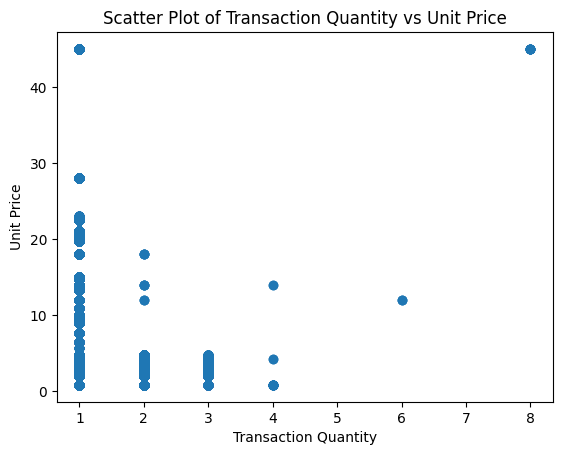

In [71]:
plt.scatter(df['transaction_qty'], df['unit_price'])
plt.xlabel('Transaction Quantity')
plt.ylabel('Unit Price')
plt.title('Scatter Plot of Transaction Quantity vs Unit Price')
plt.show()


In [72]:
top_5_revenue_products = df.groupby('product_detail')['total_sales'].sum().nlargest(5).index
avg_qty_top_products = df[df['product_detail'].isin(top_5_revenue_products)].groupby('product_detail')['transaction_qty'].mean()
print("Top 5 products by revenue and their avg transaction quantity:\n", avg_qty_top_products)


Top 5 products by revenue and their avg transaction quantity:
 product_detail
Cappuccino Lg                   1.497475
Dark chocolate Lg               1.541103
Latte Rg                        1.552831
Morning Sunrise Chai Lg         1.535689
Sustainably Grown Organic Lg    1.503884
Name: transaction_qty, dtype: float64


In [73]:
avg_revenue_per_transaction = df.groupby('store_location')['total_sales'].mean()
print("Average revenue per transaction by store location:\n", avg_revenue_per_transaction)


Average revenue per transaction by store location:
 store_location
Astoria            4.589891
Hell's Kitchen     4.661696
Lower Manhattan    4.814726
Name: total_sales, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

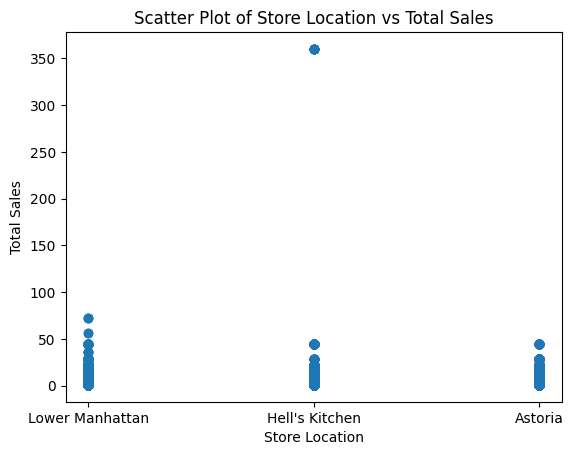

In [74]:
plt.scatter(df['store_location'], df['total_sales'])
plt.xlabel('Store Location')
plt.ylabel('Total Sales')
plt.title('Scatter Plot of Store Location vs Total Sales')
plt.show